In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


**DATA EXPLORATION**

In [8]:
df.shape

(142193, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [12]:
df['RainToday'].replace({
    'Yes' : 1,
    'No' : 0
},inplace = True)

df['RainTomorrow'].replace({
    'Yes' : 1,
    'No' : 0
},inplace = True)

C:\Users\soham\AppData\Local\Temp\ipykernel_13328\1133173722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({
C:\Users\soham\AppData\Local\Temp\ipykernel_13328\1133173722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'].replace({
C:\Users\soham\AppData

**we will check if the dataset is unbalanced or balanced**

In [15]:
import numpy as np
counts = df['RainTomorrow'].value_counts()
counts.values

array([110316,  31877], dtype=int64)

In [17]:
counts.index

Index([0, 1], dtype='int64', name='RainTomorrow')

Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')

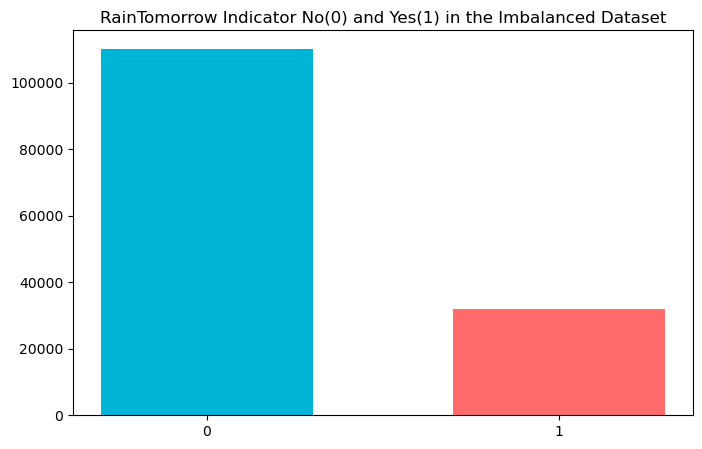

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
plt.bar( x=counts.index , height = counts.values,color = ['#00b4d8', '#ff6b6b'] 
        , width= 0.6 ,align='center')
plt.xticks(ticks = [0, 1])
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')

**Handling Class Imbalance For Rainfall Prediction**

In [21]:
no = df[df['RainTomorrow'] == 0]
yes = df[df['RainTomorrow'] == 1]

In [24]:
from sklearn.utils import resample
yes_oversampled = resample(yes,replace=True,n_samples=len(no),random_state=123)

In [25]:
over_sample = pd.concat([no,yes_oversampled])

Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) in the balanced Dataset')

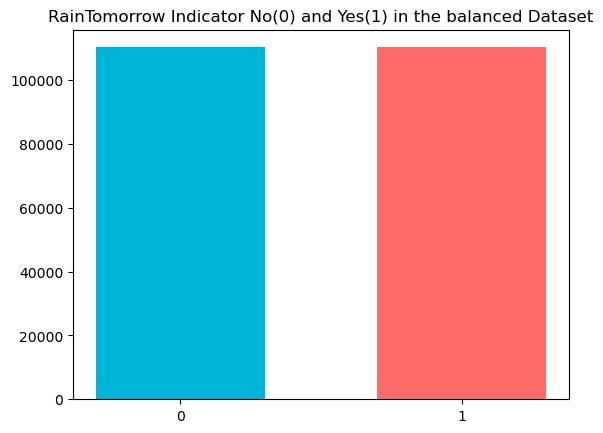

In [28]:
counts = over_sample['RainTomorrow'].value_counts()
plt.bar( x=counts.index , height = counts.values,color = ['#00b4d8', '#ff6b6b'] 
        , width= 0.6 ,align='center')
plt.xticks(ticks = [0, 1])
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the balanced Dataset')

**missing data**

In [31]:
null_values = over_sample.isnull().sum()

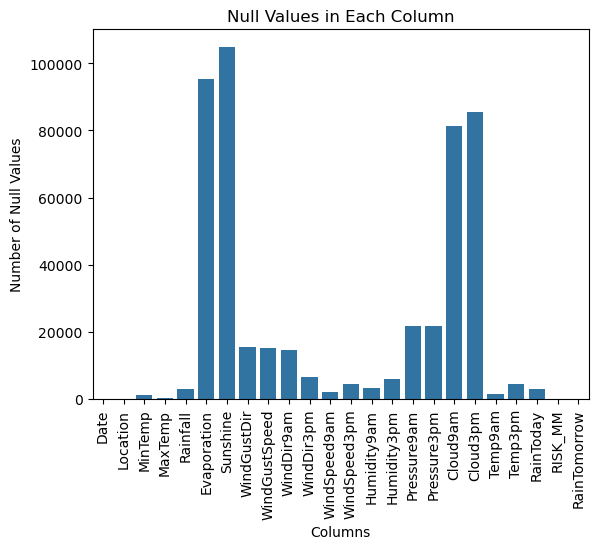

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [34]:
total = over_sample.isnull().sum().sort_values(ascending=False)
percent = (over_sample.isnull().sum()/over_sample.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562


**Imputation and Transformation**

In [38]:
over_sample.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [40]:
over_sample['Date'] = over_sample['Date'].fillna(over_sample['Date'].mode()[0])
over_sample['Location'] = over_sample['Location'].fillna(over_sample['Location'].mode()[0])
over_sample['WindGustDir'] = over_sample['WindGustDir'].fillna(over_sample['WindGustDir'].mode()[0])
over_sample['WindSpeed9am'] = over_sample['WindSpeed9am'].fillna(over_sample['WindSpeed9am'].mode()[0])
over_sample['WindDir3pm'] = over_sample['WindDir3pm'].fillna(over_sample['WindDir3pm'].mode()[0])
over_sample['WindDir9am'] = over_sample['WindDir9am'].fillna(over_sample['WindDir9am'].mode()[0])

In [42]:
over_sample.isnull().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir           0
WindGustSpeed     15354
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [44]:
over_sample.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [46]:
over_sample['MinTemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7, 13.1, 12.6,  9.8,
       11.2, 11.5, 17.1, 20.5, 15.3, 16.2, 16.9, 20.1, 12.5, 12. , 11.3,
        9.6, 10.5, 12.3, 13.7, 16.1, 14. , 17. , 17.3, 17.2, 17.4, 19.8,
       14.9, 13.9, 18.6, 19.3, 18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3,
       22. , 28. , 24.4, 21.5, 21.7, 23.5, 28.3, 18.4, 13.5, 12.4, 13.3,
       18. , 18.7, 15.5,  8.9, 15. , 15.4, 16. , 12.8, 13.2, 13.8,  7.6,
        8.3, 11. , 10. ,  8.8,  8.4,  9.3, 14.4, 10.8, 10.1,  9.1, 10.4,
       12.2, 10.7,  7.8,  8.1,  7.5,  8.2,  9.9,  3.5,  6.6,  7. ,  5.7,
        6.2,  6. ,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7, 11.6,
        8. ,  2.2,  2.8, -2. , -1.3,  2. ,  0.5,  1.2,  0.6,  5. ,  3.4,
        0. , -1.5, -1.7, -0.4,  0.1,  4.8,  2.9, -0.6, -0.3, -1. ,  0.8,
       -0.1,  6.5, -0.8,  1.9,  6.8,  1.6,  5.5,  1.1,  1. ,  6.3,  nan,
        4.5,  1.7,  4. ,  3.8,  6.4, 10.6,  5.9, 14

In [48]:
import math
median_MinTemp = math.floor(over_sample['MinTemp'].median())
median_MaxTemp = math.floor(over_sample['MaxTemp'].median())
median_Rainfall	 = math.floor(over_sample['Rainfall'].median())
median_WindGustSpeed = math.floor(over_sample['WindGustSpeed'].median())
median_Humidity3pm = math.floor(over_sample['Humidity3pm'].median())
median_Pressure3pm = math.floor(over_sample['Pressure3pm'].median())
median_Pressure9am = math.floor(over_sample['Pressure9am'].median())
median_Cloud9am = math.floor(over_sample['Cloud9am'].median())
median_Cloud3pm = math.floor(over_sample['Cloud3pm'].median())
median_Temp9am = math.floor(over_sample['Temp9am'].median())
median_Temp3pm = math.floor(over_sample['Temp3pm'].median())
median_RISK_MM = math.floor(over_sample['RISK_MM'].median())
median_Evaporation = math.floor(over_sample['Evaporation'].median())
median_Sunshine = math.floor(over_sample['Sunshine'].median())
median_WindSpeed3pm = math.floor(over_sample['WindSpeed3pm'].median())
median_Humidity9am  = math.floor(over_sample['Humidity9am'].median())

In [50]:
over_sample.fillna({
    'MinTemp' : median_MinTemp,
    'MaxTemp' : median_MaxTemp,
    'Rainfall' : median_Rainfall,
    'WindGustSpeed' : median_WindGustSpeed,
    'Humidity3pm' : median_Humidity3pm,
    'Pressure3pm' : median_Pressure3pm,
    'Pressure9am' : median_Pressure9am,
    'Cloud9am' : median_Cloud9am,
    'Cloud3pm' : median_Cloud3pm,
    'Temp9am' : median_Temp9am,
    'Temp3pm' : median_Temp3pm,
    'RISK_MM' : median_RISK_MM,
    'Evaporation' : median_Evaporation,
    'Sunshine' : median_Sunshine,
    'WindSpeed3pm' : median_WindSpeed3pm,
    'Humidity9am' : median_Humidity9am 
}, inplace = True)

In [52]:
print(over_sample['RainToday'].value_counts(dropna=False))

RainToday
0.0    150151
1.0     67357
NaN      3124
Name: count, dtype: int64


In [54]:
over_sample['RainToday'] = over_sample['RainToday'].fillna(0.0)

In [56]:
over_sample.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

**Convert categorical features to continuous features with Label Encoding**

In [59]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in over_sample.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    over_sample[col] = lencoders[col].fit_transform(over_sample[col])

In [60]:
over_sample.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,4.0,6.0,13,44.0,13,...,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,4.0,6.0,14,44.0,6,...,25.0,1010.6,1007.8,6.0,6.0,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,4.0,6.0,15,46.0,13,...,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,4.0,6.0,4,24.0,9,...,16.0,1017.6,1012.8,6.0,6.0,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,4.0,6.0,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [63]:
import warnings
warnings.filterwarnings("ignore")

**removing outlier**

In [66]:
Q1 = over_sample.quantile(0.25)
Q3 = over_sample.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.0
Location           25.0
MinTemp             9.2
MaxTemp            10.2
Rainfall            2.2
Evaporation         1.0
Sunshine            1.2
WindGustDir         9.0
WindGustSpeed      17.0
WindDir9am          8.0
WindDir3pm          8.0
WindSpeed9am       13.0
WindSpeed3pm       11.0
Humidity9am        26.0
Humidity3pm        30.0
Pressure9am         8.5
Pressure3pm         8.6
Cloud9am            2.0
Cloud3pm            2.0
Temp9am             9.2
Temp3pm             9.6
RainToday           1.0
RISK_MM             5.2
RainTomorrow        1.0
dtype: float64


In [68]:
over_sample = over_sample[~((over_sample < (Q1 - 1.5 * IQR)) |(over_sample > (Q3 + 1.5 * IQR))).any(axis=1)]
over_sample.shape

(74545, 24)

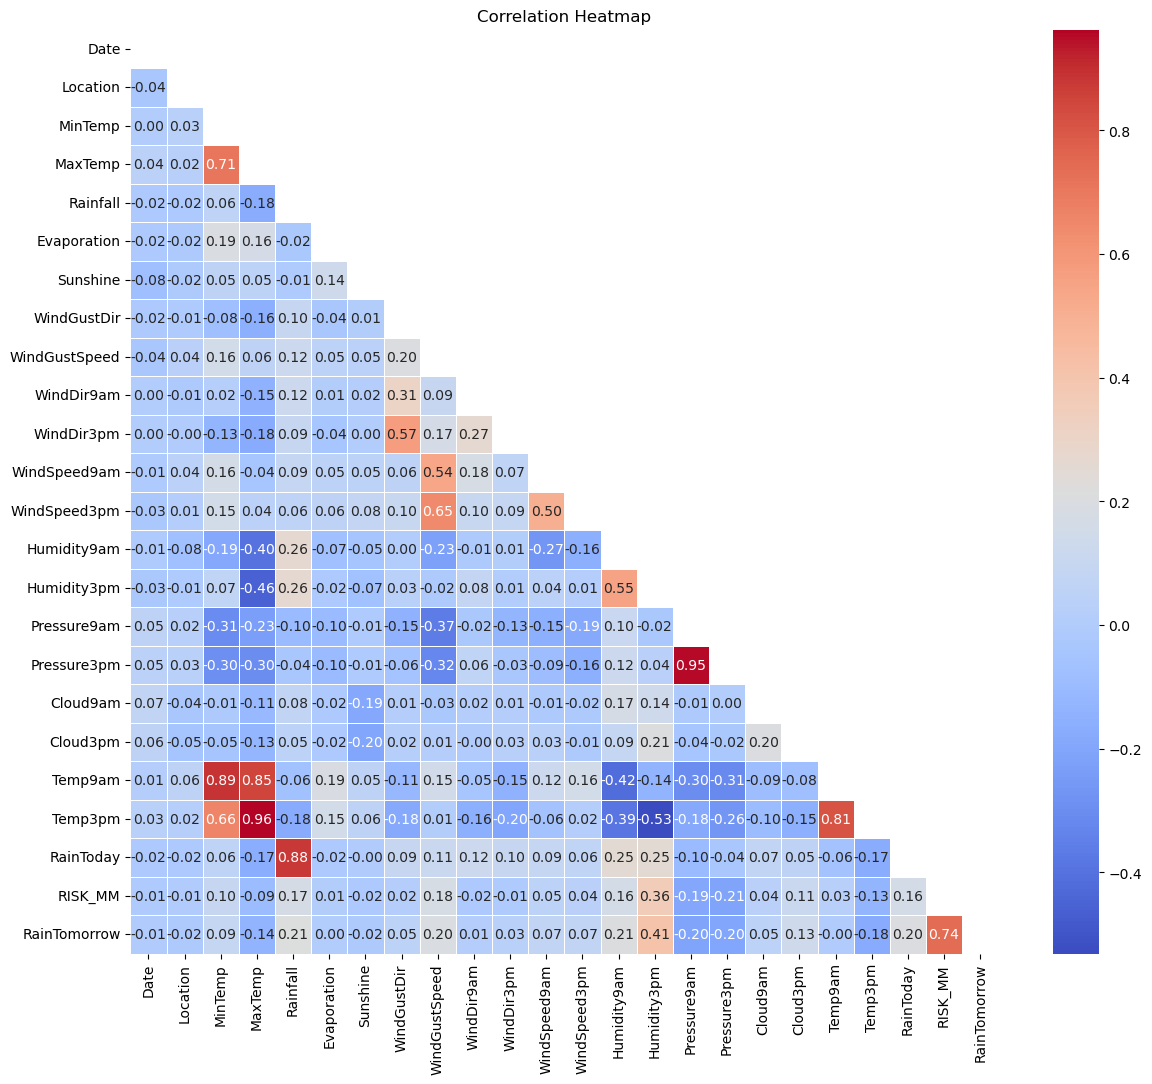

In [70]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = over_sample.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set plot size
plt.figure(figsize=(14, 12))

# Draw heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Heatmap")
plt.show()


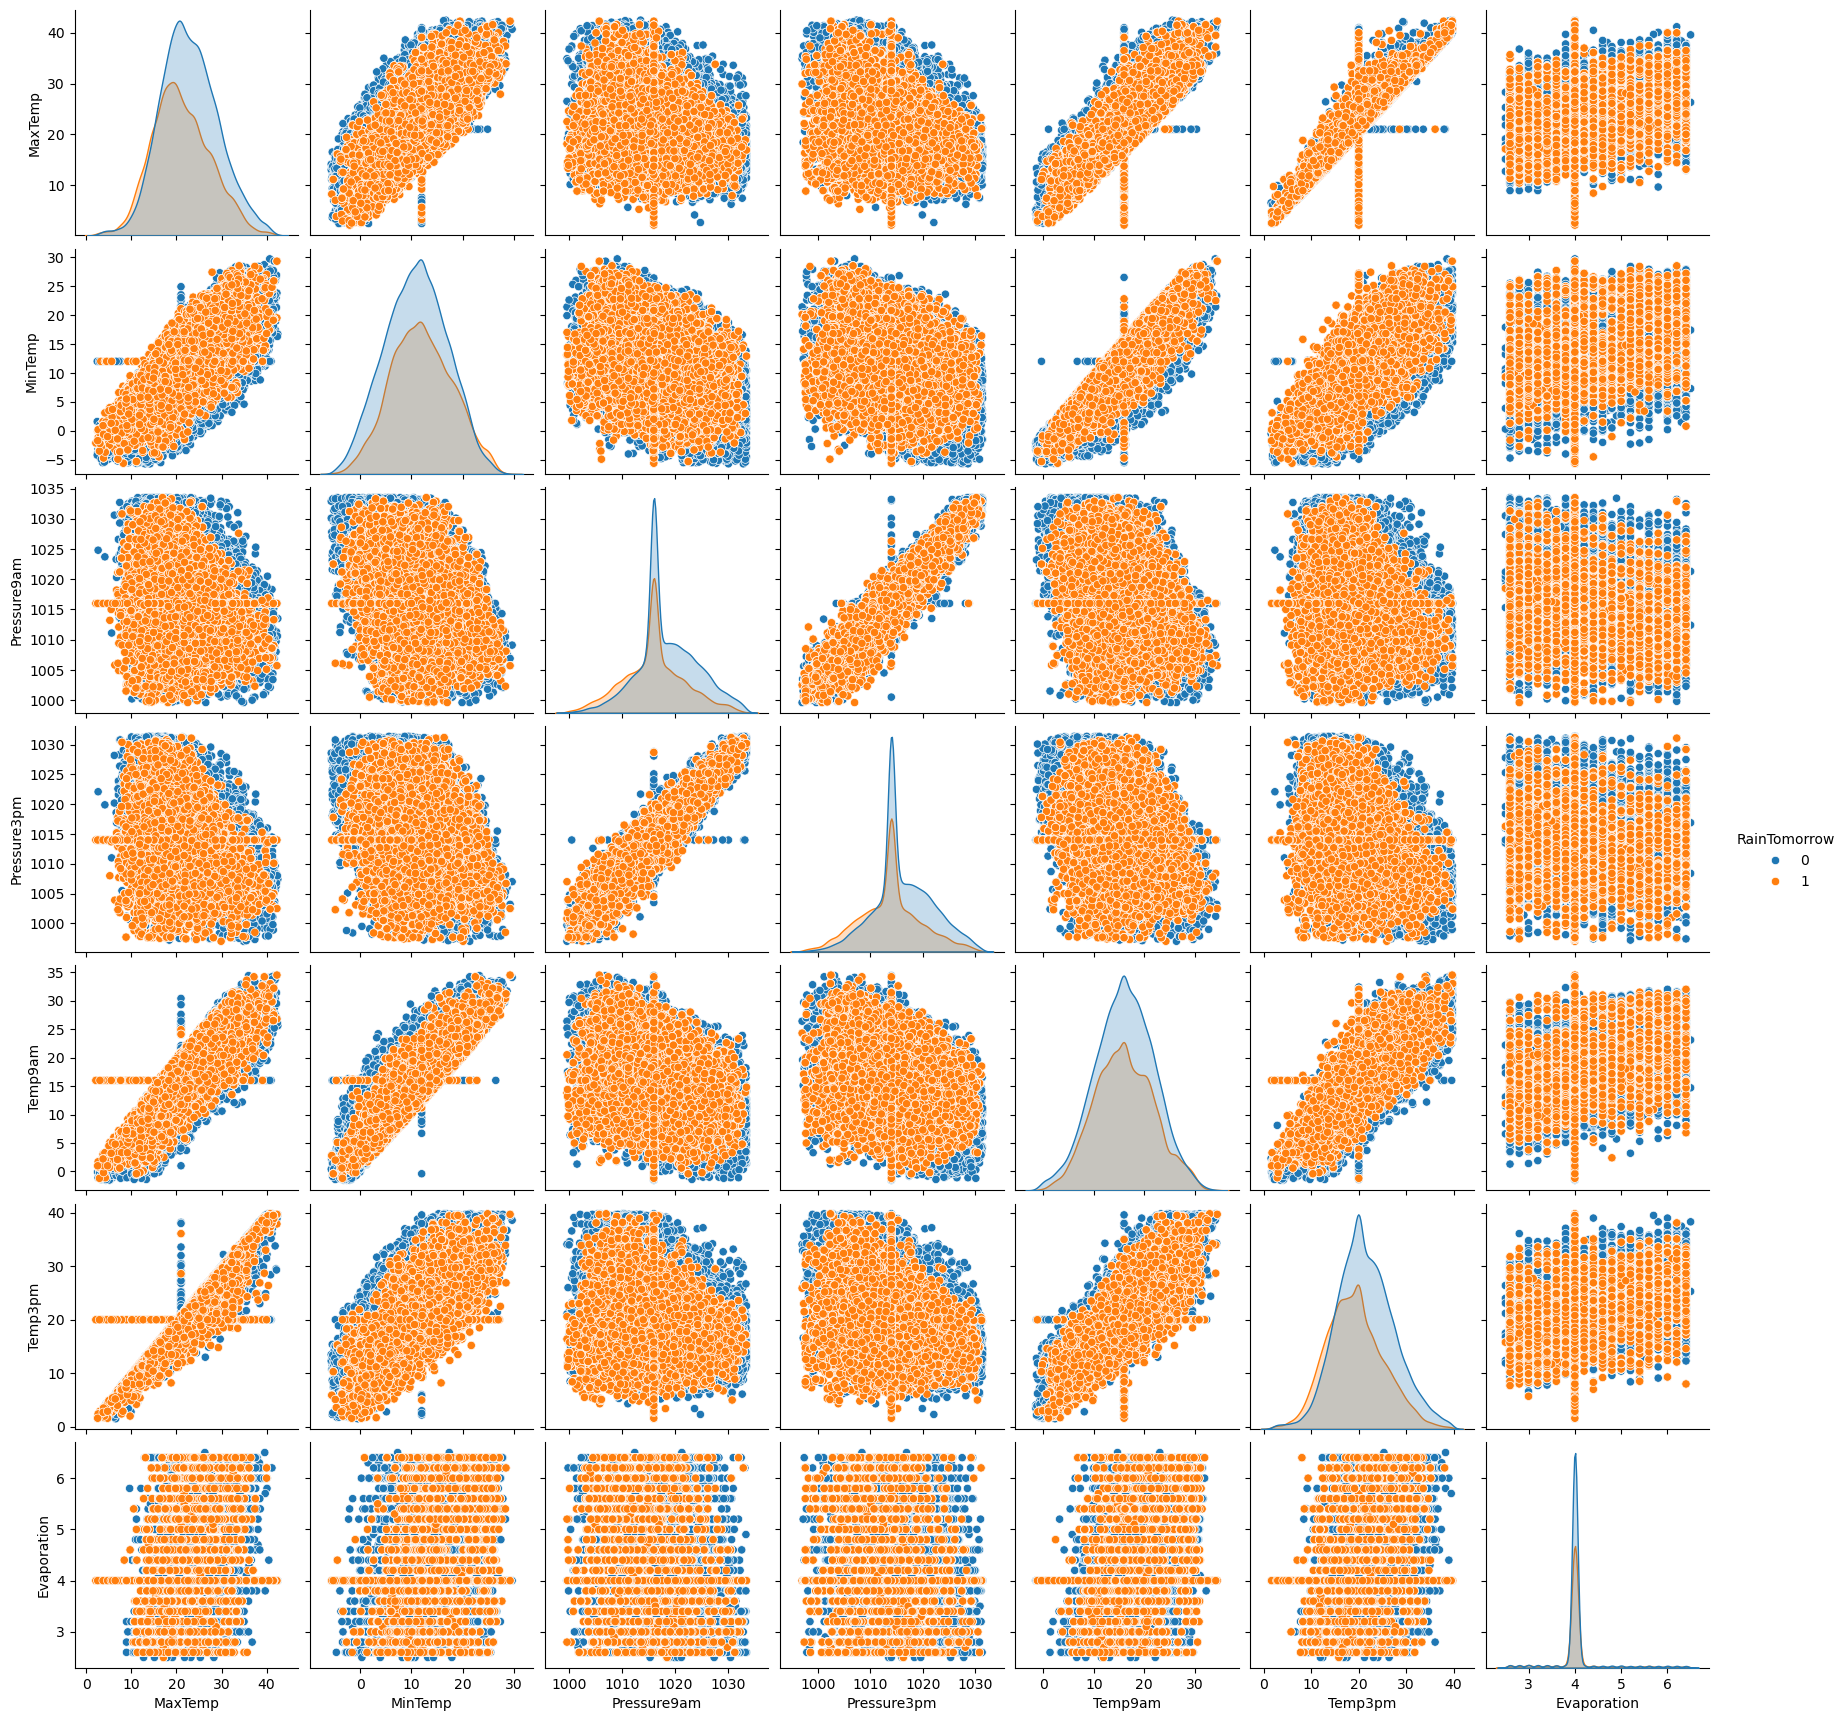

In [72]:
sns.pairplot( data=over_sample, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow')

**Selection of features by wrapping method**

**RANDOM FOREST**

In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = over_sample.drop('RainTomorrow', axis=1)
y = over_sample['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Humidity3pm', 'RISK_MM']
[0.00379874 0.0032564  0.00566326 0.00580366 0.01401257 0.00118925
 0.0020778  0.0026725  0.00882005 0.00255277 0.00356779 0.00236364
 0.00312041 0.0100621  0.05315842 0.01156837 0.01153038 0.00198931
 0.00737491 0.00505175 0.0084938  0.00560787 0.82626423]


**Training Rainfall Prediction Model with Different Models**

In [77]:
features = over_sample[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = over_sample['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [79]:
from sklearn.ensemble import RandomForestClassifier 

In [81]:
tr = RandomForestClassifier ()
tr.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
tr.score(X_test,y_test)

0.9513870258088748

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Linear SVM': CalibratedClassifierCV(LinearSVC()),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {'accuracy': acc, 'auc': auc}
    print(f"{name}: Accuracy = {acc:.3f}, AUC = {auc:.3f}")

best_acc_model = max(results.items(), key=lambda x: x[1]['accuracy'])
best_auc_model = max(results.items(), key=lambda x: x[1]['auc'])

print(f"\nBest model by Accuracy: {best_acc_model[0]} with Accuracy = {best_acc_model[1]['accuracy']:.3f}")
print(f"Best model by AUC: {best_auc_model[0]} with AUC = {best_auc_model[1]['auc']:.3f}")


Logistic Regression: Accuracy = 0.731, AUC = 0.796
Random Forest: Accuracy = 0.952, AUC = 0.987
Gradient Boosting: Accuracy = 0.755, AUC = 0.834
Linear SVM: Accuracy = 0.730, AUC = 0.796


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KNN: Accuracy = 0.801, AUC = 0.884

Best model by Accuracy: Random Forest with Accuracy = 0.952
Best model by AUC: Random Forest with AUC = 0.987


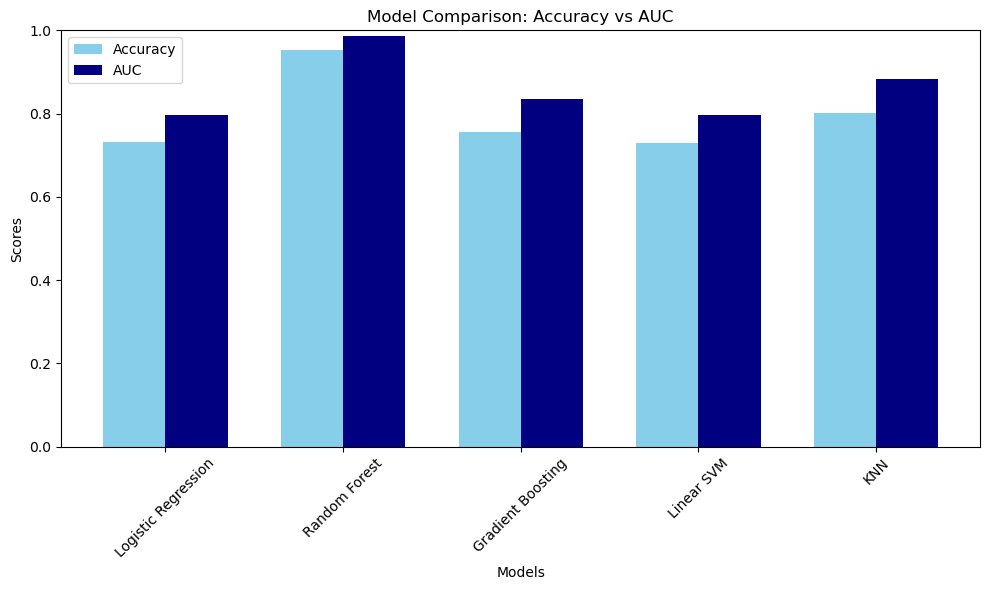

In [101]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
aucs = [results[m]['auc'] for m in model_names]

x = range(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([i + width for i in x], aucs, width=width, label='AUC', color='navy')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy vs AUC')
plt.xticks([i + width / 2 for i in x], model_names, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


**We can observe that Random Forest performed better compared to other models. However, if speed is an important thing to consider, we can stick with Random Forest instead of other model.**

In [105]:
from sklearn.metrics import classification_report
y_predict = tr.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10923
           1       0.93      0.95      0.94      7714

    accuracy                           0.95     18637
   macro avg       0.95      0.95      0.95     18637
weighted avg       0.95      0.95      0.95     18637

accuracy is 0.9513870258088748


In [107]:
import pickle
with open('Rain Prediction','wb') as f:
    pickle.dump(tr,f)

In [109]:
import json
Rain_columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open("Rain_columns.json","w") as f:
    f.write(json.dumps(Rain_columns))